# Initial EDA Project
## Completed By: Sam Robinson
### Table Of Contents 
- Introduction
- Import Packages And Data
- Inspect Data Frame Structure 
- Check For Null Values
- Vizualize Data
- Result Section

## Introduction 

Swire Coca-Cola incurs an annual loss of approximately $60 million due to machine downtimes. Currently, workers are deployed reactively to fix broken machines, but this process is slow and limits productivity. The goal of the exploratory data analysis (EDA) below is to better understand the provided data, which will help our team implement a predictive model. By developing a model that alerts workers to machines with a high probability of malfunctioning before incidents occur, we can reduce downtime and increase overall productivity.

## Import Packages And Data Set

In [2]:
import pandas as pd
import numpy as np
import openpyxl 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Data Frame
df = pd.read_csv("IWC_Work_Orders_Extract.csv", low_memory=False)

## Inspect Data Frame Structure

In [4]:
# show Data Frame
df.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31


In [5]:
# Describe Data Frame
df.describe(include='all')

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
count,1.427264e+06,1427264,1427264,1427264,1427264,1427264,1427264,1.427264e+06,152594,152594.000000,...,282407,258691,237573,2180,2.917950e+05,79447,79447,79447,79447,79447
unique,NaN,6,6,2956,2956,65927,61388,NaN,3308,NaN,...,67,141,86,36,NaN,807,4,92,137,1
top,NaN,G261,SILVERSTONE,2019-04-16,2019-04-16,00:00:00.000,00:00:00.000,NaN,000000022943,NaN,...,CAN LINE,LINE #4-FILLER_ROTARY_CAN,FILLER,FULL CAN TO ACCUMULATION TABLE,NaN,L1 FILLER_ROTARY_CAN_72_VALVE,Machines,2017-02-15,2017-02-15,9999-12-31
freq,NaN,630903,630903,936,934,212155,202920,NaN,1327,NaN,...,34208,35834,46322,251,NaN,3745,79224,53650,32713,79447
mean,4.561470e+10,NaN,NaN,NaN,NaN,NaN,NaN,8.862968e+01,NaN,115846.807954,...,NaN,NaN,NaN,NaN,3.002609e+08,NaN,NaN,NaN,NaN,NaN
std,8.387114e+10,NaN,NaN,NaN,NaN,NaN,NaN,8.037915e+02,NaN,71325.255687,...,NaN,NaN,NaN,NaN,5.581645e+06,NaN,NaN,NaN,NaN,NaN
min,1.000219e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,39801.000000,...,NaN,NaN,NaN,NaN,2.000871e+08,NaN,NaN,NaN,NaN,NaN
25%,4.022602e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+01,NaN,41046.000000,...,NaN,NaN,NaN,NaN,3.000092e+08,NaN,NaN,NaN,NaN,NaN
50%,7.044271e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.800000e+01,NaN,112995.000000,...,NaN,NaN,NaN,NaN,3.000178e+08,NaN,NaN,NaN,NaN,NaN
75%,1.002343e+09,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+01,NaN,134702.000000,...,NaN,NaN,NaN,NaN,3.000269e+08,NaN,NaN,NaN,NaN,NaN


## Checking For Percent Of Null Values Per Column

In [ ]:
## Wanted To See The Percentage Of Null Values In Each Column

In [6]:
# Calculate The Pecrentage Of Missing Values In Each Column
null_percentage_list = df.isnull().mean() * 100

# Filter columns with more than 0% null values and sort them
null_percentage_list = null_percentage_list[null_percentage_list > 0].sort_values(ascending=False)

# Create a list of tuples with column name and percentage of null values
null_percentage_list_formatted = [(col, round(percent, 2)) for col, percent in null_percentage_list.items()]

# Display the list
for col, percent in null_percentage_list_formatted:
    print(f"Column: {col}, Null Percentage: {percent}%")

Column: FUNCTIONAL_AREA_NODE_5_MODIFIED, Null Percentage: 99.85%
Column: EQUIPMENT_DESC, Null Percentage: 94.43%
Column: EQUIP_CAT_DESC, Null Percentage: 94.43%
Column: EQUIP_START_UP_DATE, Null Percentage: 94.43%
Column: EQUIP_VALID_FROM, Null Percentage: 94.43%
Column: EQUIP_VALID_TO, Null Percentage: 94.43%
Column: MAINTENANCE_PLAN, Null Percentage: 89.31%
Column: MAINTENANCE_ITEM, Null Percentage: 89.31%
Column: FUNCTIONAL_AREA_NODE_4_MODIFIED, Null Percentage: 83.35%
Column: FUNCTIONAL_AREA_NODE_3_MODIFIED, Null Percentage: 81.88%
Column: FUNCTIONAL_AREA_NODE_2_MODIFIED, Null Percentage: 80.21%
Column: FUNCTIONAL_AREA_NODE_1_MODIFIED, Null Percentage: 79.67%
Column: ORDER_DESCRIPTION, Null Percentage: 79.56%
Column: FUNCTIONAL_LOC, Null Percentage: 79.56%
Column: MAINTENANCE_TYPE_DESCRIPTION, Null Percentage: 79.56%
Column: EQUIPMENT_ID, Null Percentage: 79.56%


## Handling Missing Data

As shown above, **16 out of 25 columns** are missing over **70%** of their row values. To address this, I will remove columns with more than **90% missing values**. However, the other columns will remain untouched because they contain valuable information, such as details on the equipment used to fix the machine or whether the fix was preplanned. Despite having over 70% of their data missing, these columns could still prove useful for analysis in the future.


## Removing Columns

In [7]:
# Columns To Remove
columns_to_remove = ['FUNCTIONAL_AREA_NODE_5_MODIFIED','EQUIPMENT_DESC','EQUIP_CAT_DESC','EQUIP_START_UP_DATE','EQUIP_VALID_FROM','EQUIP_VALID_TO']

# Remove Columns
df = df.drop(columns=columns_to_remove)

In [ ]:
## Checking For Correlations In The Data 

## Correlations

C:\Users\sarob\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:121: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


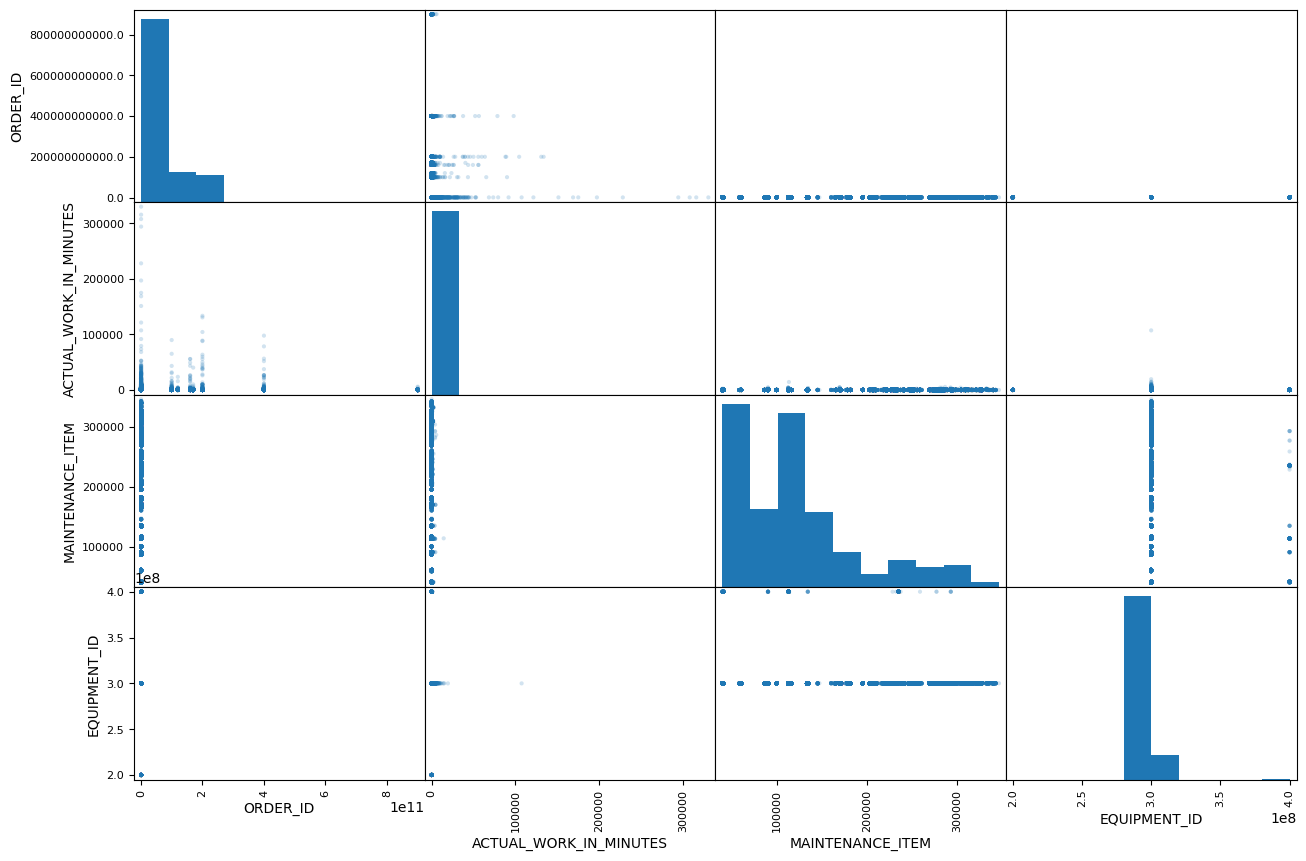

In [8]:
# Correlations
pd.plotting.scatter_matrix(df,figsize=(15, 10),alpha = 0.2)
plt.show()

In [ ]:
## Wanted To See Which Order Description Had The Longest Actual Work Time In Minutes

## Vizualize Data

In [9]:
# Group by Order Description and calculate the average
grouped_df = df.groupby('ORDER_DESCRIPTION')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Sort the DataFrame in descending order based on the average
sorted_df = grouped_df.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False)

# Get the top 10 entries
top_20_df = sorted_df.head(20)

top_20_df

,ORDER_DESCRIPTION,ACTUAL_WORK_IN_MINUTES
38418,ESTOPRELAYS/VARIOUS SERCRO ISSUES START,107420.4
77791,REBUILD HAND VALVE ON SYRUP INLET,15168.0
77676,REBUILD COMPRESSOR # 6,11430.0
87081,REPLACE SEPERATORS IN EAST AIR COMP.,11040.0
117010,WORKED ON DOUGLAS REBUILD FOR APPROX. 3,10219.2
92911,REPLACED GRIPPERS,9780.0
112173,Troubleshooting botom deform carton,9483.0
49878,INSTALL L3 LABELERS,9360.0
74491,PLEASE ORDER LOW LEVEL ALARM SWITCH KITS,9055.2
38729,EXTEND CATWALK TO ACCOMMODATE NEW LADDER,8760.0


In [ ]:
## Wanted To See Which Plant On Average Had The Longest Actual Work In Minutes

In [10]:
# Grouped_ID 
grouped_id = df.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Sorted ID
# Sort the DataFrame in descending order based on the average
sorted_id = grouped_id.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False)

# Show Sorted ID
sorted_id

,PLANT_ID,ACTUAL_WORK_IN_MINUTES
0,G221,100.328048
2,G291,94.765588
1,G261,94.086904
3,G811,65.742548
5,G816,60.720869
4,G812,50.140030


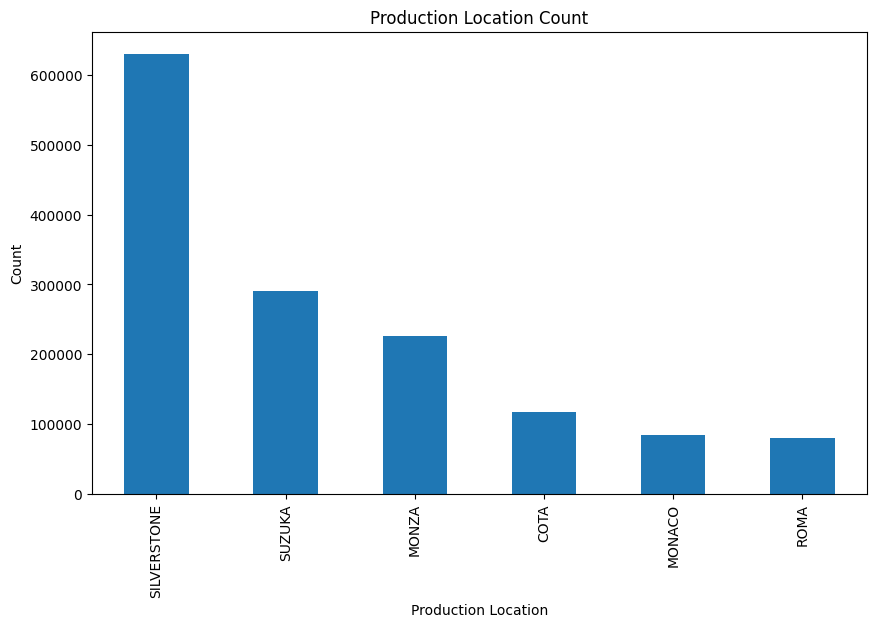

In [8]:
# Production Location Bar Graph
df['PRODUCTION_LOCATION'].value_counts().plot(kind='bar', figsize=(10,6)) 
plt.title("Production Location Count")
plt.xlabel("Production Location")
plt.ylabel("Count")
plt.show()

In [ ]:
## Wanted To See The Distribution Of Unplanned Vs Planned Maint 

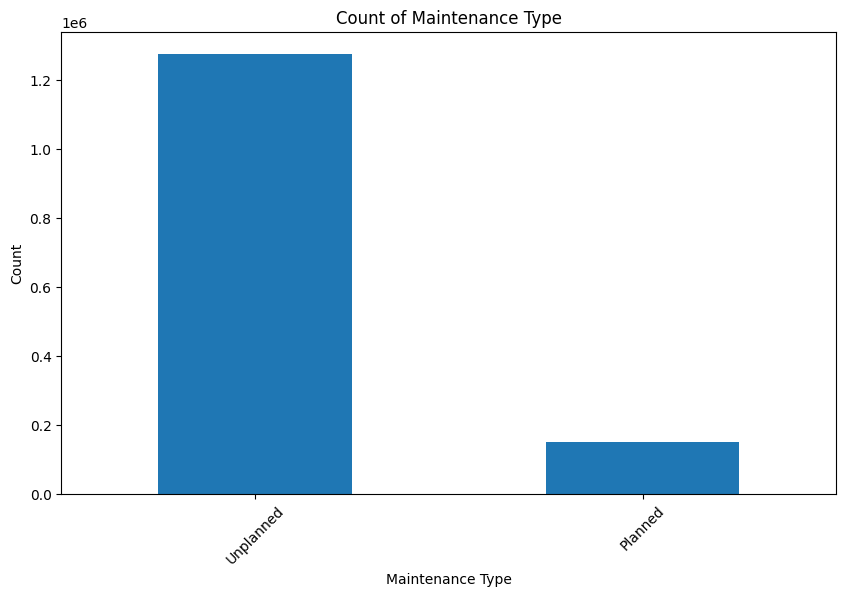

In [24]:
# Planned Vs Unplanned Graph
maint_type = df['MAINTENANCE_ACTIVITY_TYPE']

# Plotting the count of each maintenance item
maint_type.value_counts().plot(kind='bar', figsize=(10,6))  # Counting the occurrences of each item
plt.title("Count of Maintenance Type")
plt.xlabel("Maintenance Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotating x-axis labels if they are long

plt.show()

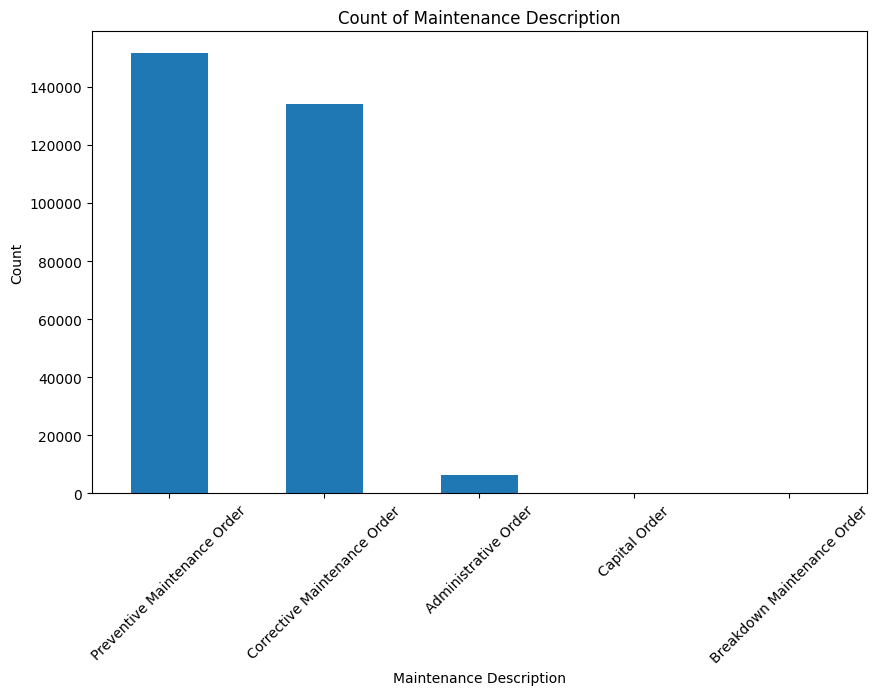

In [22]:
# Planned Vs Unplanned Graph
maint_desc = df['MAINTENANCE_TYPE_DESCRIPTION']

# Plotting the count of each maintenance item
maint_desc.value_counts().plot(kind='bar', figsize=(10,6))  # Counting the occurrences of each item
plt.title("Count of Maintenance Description")
plt.xlabel("Maintenance Description")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotating x-axis labels if they are long

plt.show()

## Result Section

Based on the EDA performed we have identified which plants that are facing the highest count of repairs as well as those with the highest average repair time. This is valuable information to better understad which plants are struggling the most with latency via repairs. We where also able to identify which Order Descriptions had on average the longest repair times. With all of this information we are able to identify which production plants are faced with the worst repair latency as well as which orders produce the longest repair time.